In [1]:
import tensorflow as tf
import os


In [132]:
# Removing Dodgy Images
import cv2
import imghdr
from PIL import Image

In [141]:
directory='data'

for folder in os.listdir(directory):
    for image in os.listdir(os.path.join(directory,folder)):
        image_path = os.path.join(directory,folder,image)

        try:
            img = Image.open(image_path)
            img.verify()
            tip=imghdr.what(image_path)
            if tip not in ['jpeg','jpg','bmp','png']:
                print('image is not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with the image {}" .format(image_path))
            os.remove(image_path)        
    

In [24]:
import numpy as np
from matplotlib import pyplot as plt


In [62]:
# Creating the DataSet using Keras

data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [63]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

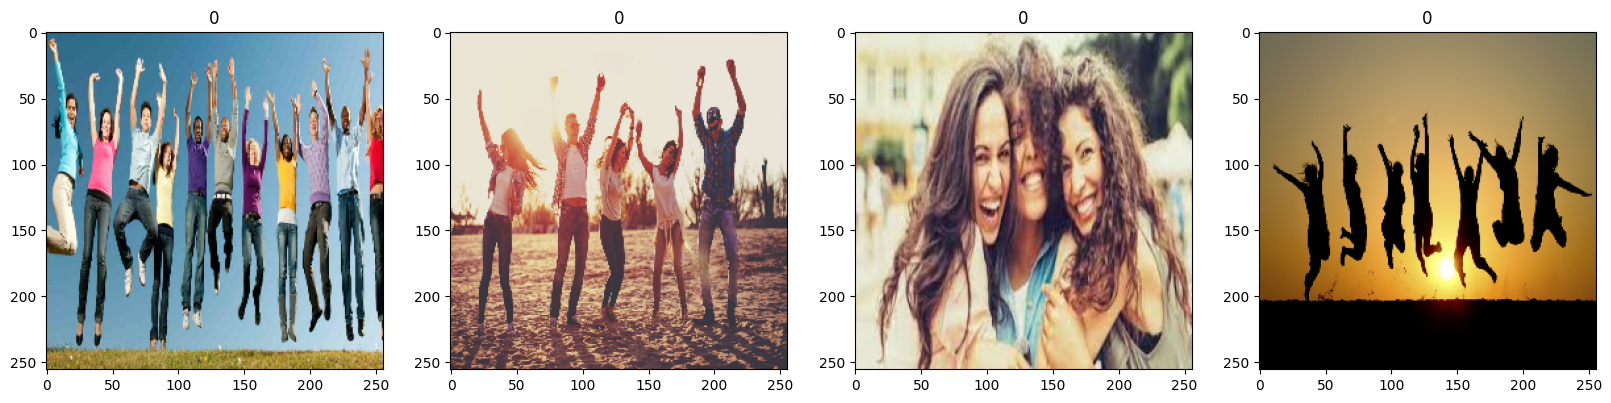

In [69]:
# 0 : Happy Faces 
# 1: Sad Faces


fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [65]:
# Preprocessing the Data 

# Scaling the Data

data = data.map(lambda x,y : (x/255 ,y))


In [84]:
# Splitting the Data

train_size = int(len(data)*.6)
test_size = int(len(data)* .1)+1
val_size = int(len(data)* .2)+1



In [89]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [90]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [92]:
model =Sequential()

model.add(Conv2D(16,(3,3),1,activation = 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [95]:
# Model Training
logdir='log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 8s 2s/step - loss: 1.9218 - accuracy: 0.5833 - val_loss: 4.1130 - val_accuracy: 0.5469
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 2.3424 - accuracy: 0.5417 - val_loss: 1.2083 - val_accuracy: 0.4219
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 1.0319 - accuracy: 0.4688 - val_loss: 0.7317 - val_accuracy: 0.4375
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.7010 - accuracy: 0.4792 - val_loss: 0.6730 - val_accuracy: 0.5625
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.6517 - accuracy: 0.5729 - val_loss: 0.5863 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.6698 - accuracy: 0.6562 - val_loss: 0.6440 - val_accuracy: 0.5781
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.6273 - accuracy: 0.7188 - val_loss: 0.5668 - val_accuracy: 0.7656
Epoch 8/20
3/3 [=========================

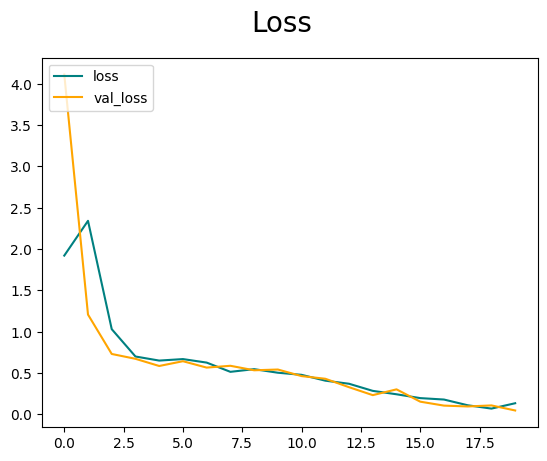

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

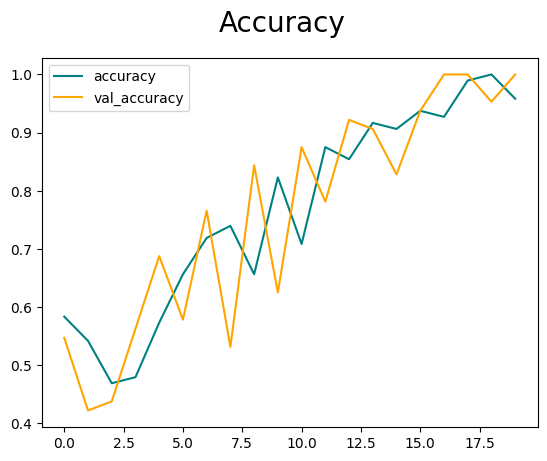

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [100]:
# Performance Evaluation

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [101]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 256ms/step


In [103]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.5 1.0 0.8333333


In [142]:
img = cv2.imread('sad_test.jpg')

plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 73ms/step


In [111]:
yhat

array([[0.941493]], dtype=float32)

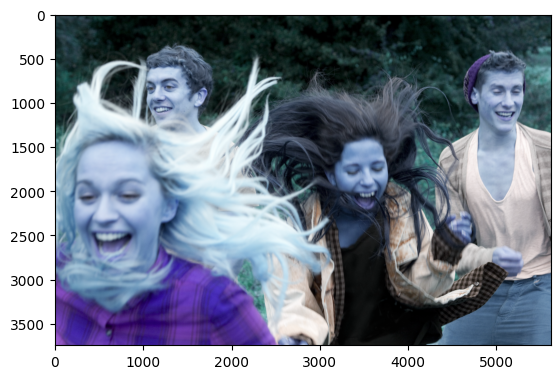

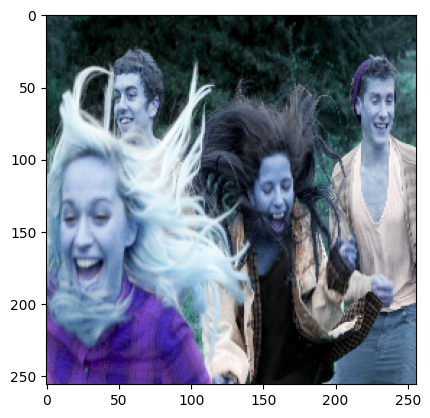

In [112]:
img = cv2.imread('happy_test.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 65ms/step


array([[0.18175203]], dtype=float32)

In [114]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifiermodel.h5'))